# My KMeans implementation

In [1]:
import random
import math

class cluster:
    # The default values are required to be k = 5, bmax_iterations = 100, balanced = False. 
    def __init__(self, k = 5, max_iterations = 100, balanced = False, epsilon = 0.05):
        self.k = k
        self.max_iterations = max_iterations
        self.balanced = balanced
        self.epsilon = epsilon

    def fit(self, X):        
        min_val = min([min(lst) for lst in X])
        max_val = max([max(lst) for lst in X])
        
        n_dimensions = len(X[0])
        n_instances = len(X)
        threshold = n_instances / self.k
        cluster_index = [-1 for _ in range(n_instances)]
        centroids = [[random.uniform(min_val, max_val) for _ in range(n_dimensions)] for _ in range(self.k)]
        
        prev_centroids = []
        
        for _ in range(self.max_iterations):
            unavailable = []
            index = [i for i in range(self.k)]
            cluster = {i: [] for i in index}
            
            for i, point in enumerate(X):
                min_index = find_min_diff_index(centroids, point, unavailable)
                cluster[min_index].append(i)
                
                if self.balanced and len(cluster[min_index]) >= threshold:
                    unavailable.append(min_index)
            
            update_centroids(centroids, cluster, X)
            if centroids_is_equal(prev_centroids, centroids, self.epsilon): 
                break
            prev_centroids = centroids
            
        for k, v in cluster.items():
            for i in v:
                cluster_index[i] = k
        
        return cluster_index, centroids        
    
# helper methods
def find_min_diff_index(centroids, target, unavailable = []):
    min_diff = math.inf
    min_index = -1
    for i, lst in enumerate(centroids):
        squared_diff = get_squared_diff(lst, target)
        if squared_diff < min_diff and i not in unavailable:
            min_diff = squared_diff
            min_index = i
    
    return min_index

def update_centroids(centroids, cluster, X):
    for cluster_index, cluster_values in cluster.items():
        if not cluster_values:
            continue
            
        cluster_points = [X[i] for i in cluster_values]
        centroid = []
        for j in range(len(X[0])):
            column = [point[j] for point in cluster_points]
            column_sum = sum(column)
            column_mean = column_sum / len(cluster_values)
            centroid.append(column_mean)
            
        centroids[cluster_index] = centroid

def centroids_is_equal(prev_centroids, centroids, epsilon):
    if len(prev_centroids) != len(centroids):
        return False
    
    for list1, list2 in zip(prev_centroids, centroids):
        if get_squared_diff(list1, list2) < epsilon ** 2:
            continue
        return False
    
    return True

def get_squared_diff(list1, list2):
    return sum([(x - y) ** 2 for x, y in zip(list1, list2)])

## Test

In [2]:
X = [[0, 0], [2, 2], [0, 2], [2, 0], [10, 10], [8, 8], [10, 8], [8, 10]]
test1 = cluster(k = 2, balanced = True)
test1.fit(X)

([0, 0, 0, 0, 1, 1, 1, 1], [[1.0, 1.0], [9.0, 9.0]])

# Performance Comparison

## The following chart is based on cluster_assignments.

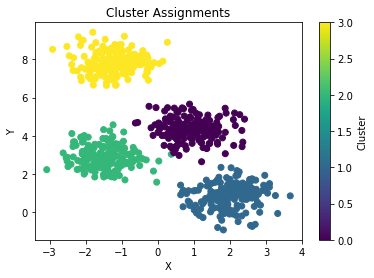

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis')
plt.title('Cluster Assignments')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Cluster')
plt.show()

## The following chart is based on using X as the parameter as input to my fit function.

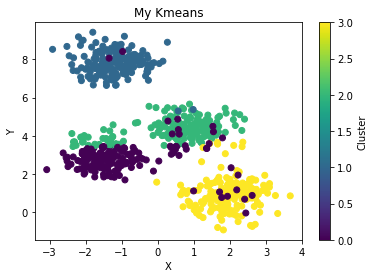

In [4]:
test2 = cluster(k = 4, max_iterations = 10000, balanced = True)
my_cluster_assignments, _ = test2.fit(X)

plt.scatter(X[:, 0], X[:, 1], c=my_cluster_assignments, cmap='viridis')
plt.title('My Kmeans')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Cluster')
plt.show()

- Comparing my chart and the chart plotted with cluster_assignments, I think my implementation’s hypotheses are correct.

## The following chart is based on using X as the parameter as input to KMeans as implemented in scikit-learn.

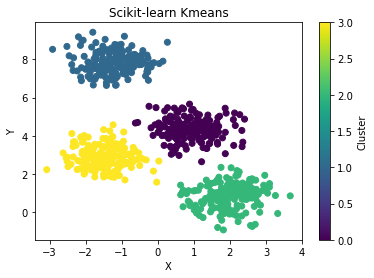

In [5]:
from sklearn.cluster import KMeans

# Create an instance of KMeans
kmeans = KMeans(n_clusters=4)

# Fit the KMeans model to your data
kmeans.fit(X)
scikitlearn_cluster_assignments = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=scikitlearn_cluster_assignments, cmap='viridis')
plt.title('Scikit-learn Kmeans')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Cluster')
plt.show()

- Comparing scikit-learn's chart and the chart plotted with cluster_assignments, I think scikit-learn implementation’s hypotheses are correct.

## My implementation's hypotheses v.s. expected values in cluster_assignments

In [6]:
from sklearn import metrics
metrics.rand_score(my_cluster_assignments, cluster_assignments)

0.9056693235234008

## My implementation's hypotheses v.s. the hypotheses generated by scikit-learn

In [7]:
metrics.rand_score(my_cluster_assignments, scikitlearn_cluster_assignments)

0.9046842427958308

- Based on the reference, I used Rand index to measures the similarity of cluster assignments generated by difference implementations. The way to interpret the score is that perfect score is 1.0, and the poorly agreeing labels have lower scores close to 0. Thus, since both my scores are high, my hypothese are close to the perfect result and scikit-learn's hypotheses. (Reference: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)

# Choose and run clustering algorithms

## Chicago Taxi Data

- Cluster Algorithm: For this dataset, I used KMeans as the clustering algorithm because this is a geological data.
- Data Pre-processing: I discarded all columns except the Pickup Centroid Latitude and Pickup Centroid Longtitude.
- Output: The output from the algorithm is shown below. I tried a couple of clusters numbers, and 4 made the most sense for me. Therefore, I separated Chicago into 4 areas where two of them were dense (downtown area) and the other two are sparse.
- Evaluation: I used charts as metrics to evaluate my output. The performace is shown below. It is what I expected because we can clearly see that KMeans is doing a good job here at separating the datapoints into four clusters.

In [8]:
import pandas as pd
chicago_taxi_df = pd.read_csv('Taxi_Trips_2013-2023.csv')
chicago_taxi_df

,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,52dc9029821e61db30a51838cb3cd711bd0e03cb,275f3f891b8c0ba8f2958873f850d2a03993c99f5f79f6...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,1140.0,11.20,NaN,NaN,76.0,NaN,...,21.0,49.75,Cash,4053 - 40193 Adwar H. Nikola,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
1,11eeb6710caa0606028c7ba025bfa18c277886e8,6c87f1d023a9d7146ae81b6aa4648bf98cec52cceb9f08...,02/01/2023 12:15:00 AM,02/01/2023 12:15:00 AM,660.0,2.70,NaN,NaN,32.0,7.0,...,0.0,13.00,Credit Card,Taxi Affiliation Services,41.878866,-87.625192,POINT (-87.6251921424 41.8788655841),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)
2,113aa7bf346c585bb941cda2d5c0015c8a1472f0,bb4e75d3065311c33024a434640731c43fd2cf9e4482eb...,02/01/2023 12:15:00 AM,02/01/2023 12:30:00 AM,480.0,0.00,NaN,NaN,8.0,24.0,...,0.0,9.75,Credit Card,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
3,2503e3944e5c82b89638447ad361638111129375,57c40509cae37a0e5e536a657cdb7f8c6824314bc466a7...,02/01/2023 12:15:00 AM,02/01/2023 12:45:00 AM,1620.0,0.00,1.703198e+10,NaN,76.0,NaN,...,28.0,91.00,Credit Card,Taxi Affiliation Services,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),NaN,NaN,NaN
4,23ddcfba2ad714fe0303909961ea74873be50da2,40720025b84fa778c47d6637db01b1d8f2de2eabafa529...,02/01/2023 12:15:00 AM,02/01/2023 12:15:00 AM,360.0,0.10,NaN,NaN,76.0,NaN,...,4.0,13.75,Cash,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101783,9209df4c3541198fda3173a226f2df619a806022,dee6032433df09fe8d3fd4fa958380308c902dc98f81c3...,02/07/2023 11:45:00 PM,02/07/2023 11:45:00 PM,760.0,2.69,1.703183e+10,1.703132e+10,28.0,32.0,...,0.0,10.90,Mobile,Medallion Leasin,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.884987,-87.620993,POINT (-87.6209929134 41.8849871918)
101784,f0957a8f6bef37bb2872649fb3c76ad1a179acab,3f6562a2a18861cf21a21101c14cc91dd7c4d72cdce80f...,02/07/2023 11:45:00 PM,02/07/2023 11:45:00 PM,4.0,0.00,NaN,NaN,8.0,8.0,...,0.0,77.40,Credit Card,Chicago Independents,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
101785,4cb74df671cfccceb9b592f347ef1a94c1540c7a,b31f46efa11263565e3dba91f26ff96b74516e8108ac56...,02/14/2023 10:30:00 AM,02/14/2020 06:00:00 PM,NaN,2.90,NaN,NaN,8.0,24.0,...,0.0,13.50,Cash,Taxi Affiliation Services,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.901207,-87.676356,POINT (-87.6763559892 41.9012069941)
101786,7f24c5101df65952ef318f558b8b071989ff7c17,65057dc10e707a18a32bc4371c5db0b828e90f9caf1068...,04/27/2023 11:15:00 AM,04/21/2019 09:30:00 PM,NaN,15.10,NaN,NaN,76.0,7.0,...,4.0,52.90,Credit Card,Taxi Affiliation Services,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.922686,-87.649489,POINT (-87.6494887289 41.9226862843)


In [9]:
chicago_taxi_data_df = chicago_taxi_df.iloc[:, 17:19]
chicago_taxi_data_df = chicago_taxi_data_df.dropna()

chicago_taxi_data_df

,Pickup Centroid Latitude,Pickup Centroid Longitude
0,41.980264,-87.913625
1,41.878866,-87.625192
2,41.899602,-87.633308
3,41.979071,-87.903040
4,41.980264,-87.913625
...,...,...
101782,41.878866,-87.625192
101783,41.885281,-87.657233
101784,41.899602,-87.633308
101785,41.899602,-87.633308


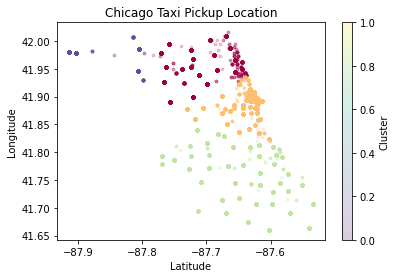

In [10]:
from sklearn.cluster import KMeans
n_clusters = 4
kmeans = KMeans(n_clusters = n_clusters, random_state=42)
kmeans.fit(chicago_taxi_data_df)

import numpy as np

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, n_clusters)]

for label, color in zip(set(kmeans.labels_), colors):
    p = chicago_taxi_data_df[kmeans.labels_ == label]
    plt.scatter(p['Pickup Centroid Longitude'], p['Pickup Centroid Latitude'], alpha=0.2, color=color, s=8)
    
centroids = kmeans.cluster_centers_

plt.title('Chicago Taxi Pickup Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar(label='Cluster')
plt.show()

## Mopsi Data Subset

- Cluster Algorithms: I chose both KMeans and DBSCAN, since in my opion KMeans is more like getting an idea about how the datapoints are located in average, where DBSCAN is to start locally to find clusters and therefore is more likely to get clear blobs.
- Data Pre-processing: I did two things. First, based on the geographical location of Finland, I figure out that two columns 0 and 1 represent 10000 * longitude and 10000 * latitude. Therefore, I renamed the column names and divided each value by 10000.
- Output: The output from the algorithm is shown below. I tried a couple of hyperparameters for KMeans and DBSCAN, mainly on n_clusters, eps, min_sample.
- Evaluation: I used charts as metrics to evaluate my output. In my opinion, DBSCAN is doing a better job at categorizing the data points down below into the main blob, which is what I expected. The centroids in KMeans are mostly trying to split the main blob and putting the other scattered data points into one cluster, which is not what I expected.

In [11]:
finnish_location_data_df = pd.read_csv('Mopsi_Locations_Until_2012_Finland.txt', sep="\t", header=None)
finnish_location_data_df

,0,1
0,625983,297439
1,626146,297440
2,626144,297456
3,626004,297394
4,626018,297437
...,...,...
13462,626042,297444
13463,625977,297443
13464,626050,297404
13465,625995,297426


In [12]:
# data-preprocessing
finnish_location_data_df = finnish_location_data_df.rename(columns={0: 'longitude'})
finnish_location_data_df = finnish_location_data_df.rename(columns={1: 'latitude'})

finnish_location_data_df = finnish_location_data_df / 10000
finnish_location_data_df 

,longitude,latitude
0,62.5983,29.7439
1,62.6146,29.7440
2,62.6144,29.7456
3,62.6004,29.7394
4,62.6018,29.7437
...,...,...
13462,62.6042,29.7444
13463,62.5977,29.7443
13464,62.6050,29.7404
13465,62.5995,29.7426


### KMeans

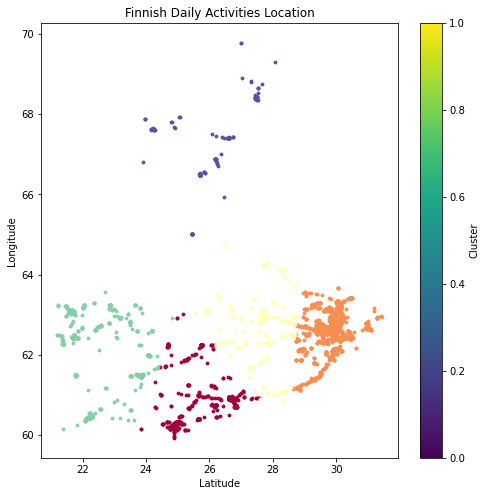

In [13]:
n_clusters = 5
kmeans = KMeans(n_clusters = n_clusters, random_state=42)
kmeans.fit(finnish_location_data_df)

import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=[8, 8])

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, n_clusters)]

for label, color in zip(set(kmeans.labels_), colors):
    p = finnish_location_data_df[kmeans.labels_ == label]
    plt.scatter(p['latitude'], p['longitude'], alpha=1, color=color, s=8)

plt.title('Finnish Daily Activities Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar(label='Cluster')
plt.show()

### DBSCAN

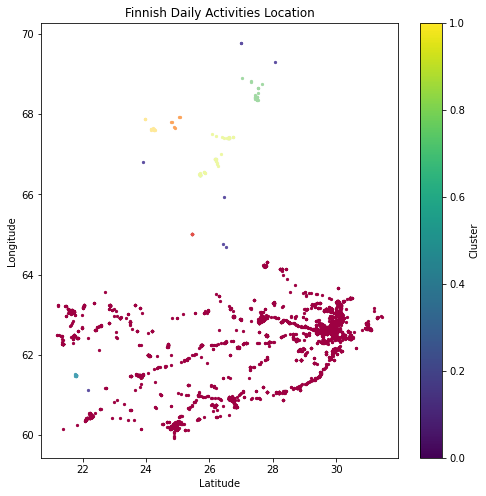

In [14]:
from sklearn.cluster import DBSCAN
import numpy as np

plt.figure(figsize=[8, 8])

db = DBSCAN(eps=0.5, min_samples=5).fit(finnish_location_data_df)
labels = db.labels_
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(set(labels), colors):
    p = finnish_location_data_df[labels == label]
    plt.scatter(p['latitude'], p['longitude'], alpha=1, color=color, s=5)
    
plt.title('Finnish Daily Activities Location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar(label='Cluster')
plt.show()